In [1]:
from ipywidgets import interact
from matplotlib import pyplot as plt
import numpy as np
import torch as torch
from functools import partial

plt.rc('figure', dpi=90)

def plot_function(f, title=None, min=-2.1, max=2.1, color='r', ylim=None):
    x = torch.linspace(min,max, 100)[:,None]
    if ylim: plt.ylim(ylim)
    plt.plot(x, f(x), color)
    if title is not None: plt.title(title)
    plt.show()

# Regressione lineare (Predizione)

Immaginiamo di avere dei dati di un fenomeno da studiare, ad esempio i dati sugli scontrini medi di un supermercato rispetto al reddito degli acquirenti.
In questo caso i dati sono simulati.
In particolare, li generiamo con una funzione lineare e gli aggiungiamo del rumore.


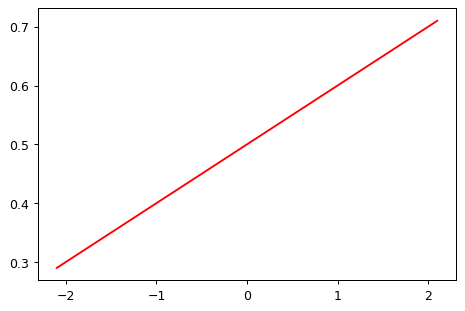

In [2]:
def lf(a,b,x):
    return a*x+b

def make_lf(a,b): 
    return partial(lf,a,b)

l= make_lf(0.1,0.5)
plot_function(l)


In [3]:
def noise(x, scale): return np.random.normal(scale=scale, size=x.shape)
def add_noise(x, mult, add): return x * (1+noise(x,mult)) + noise(x,add)

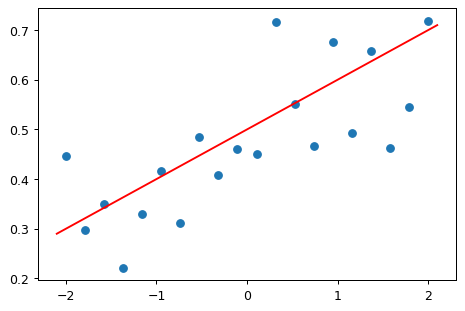

In [4]:
np.random.seed(42)

x = torch.linspace(-2, 2, steps=20)[:,None]
y = add_noise(l(x), 0.001, 0.1)
plt.scatter(x,y)
plot_function(l)

Adesso, visti i dati disponibili ci chiediamo:
Qual'è la retta che meglio approssima i dati che abbiamo?
Trovata la retta, se ci sono motivi per credere che i dati hanno il trend trovato potremo prevedere l' scontrino medio y del cliente che si presenta con un novo reddito x.

## interpolazione "manuale"

Possiamo usare gli strumenti interattivi di Jupyter Notebook per cercare manualmente i due parametri della retta a e b che meglio approssimano i dati.

In [5]:
@interact(a=(-0.5,0.5), b=.5)
def plot_l(a, b):
    plt.scatter(x,y)
    plot_function(make_lf(a,b))

interactive(children=(FloatSlider(value=0.0, description='a', max=0.5, min=-0.5), FloatSlider(value=0.5, descr…

Evidentemente, si puà riuscire a stimare i parametri della retta con i due slider.
Ma, come possiamo misurare la bontà dell'approssimazione?
Non sarebbe meglio avere un qualche indice numerico che ci dice quanto è buona l'approssimazione trovata?

Possiamo provare a calcolare l'errore assoluto medio. Ovvero la media degli scarti assoluti degli scarti MSA


In [6]:
def msa(predizione, attuale): return (torch.abs(predizione-attuale)).mean()

Proviamo ad aggiungere questa informazione al grafico interattivo e vediamocome ci può aiutare nella nostra ricerca di a e b:

In [7]:
@interact(a=(-0.5,0.5), b=(0.0,1.1))
def plot_l(a, b):
    lf=make_lf(a,b)
    plt.scatter(x,y)
    scarto = msa(lf(x), y)
    plot_function(lf, title=f"MSA: {scarto:.2f}")

interactive(children=(FloatSlider(value=0.0, description='a', max=0.5, min=-0.5), FloatSlider(value=0.55, desc…

Il nostro indice MSA ci ha guidati verso i valori di a e b che rappresentano meglio il nostro dataset.
Ci sono altri indici come la Media degli Scarti Assoluti.
Ad esempio possiamo considerare lo Scarto Quadratico Medio

In [ ]:
def msqm(predizione, attuale): return (torch.sqrt((predizione-attuale)**2)).mean()